In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [2]:
style.use('ggplot')

start = dt.datetime(2000, 1, 1)
end = dt.datetime.now()

                Open      High       Low     Close        Volume
Date                                                            
2019-02-13  10123.61  10140.98  10074.34  10090.58           NaN
2019-02-12  10032.08  10100.23  10032.08  10097.74  2.319601e+09
2019-02-11  10029.84  10065.52   9988.83  10004.25  2.374102e+09
2019-01-30   9915.97   9959.03   9909.81   9932.26  2.028959e+09
2019-01-29   9944.71   9952.34   9893.96   9931.59  1.678626e+09


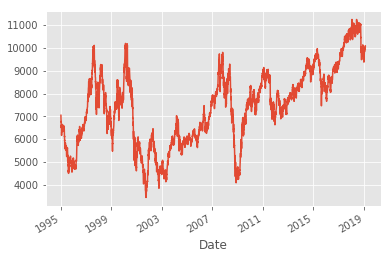

In [3]:
stock_name='^TWSE'
df = web.DataReader(stock_name, 'stooq', start, end)
print(df.head())
df['Close'].plot()
plt.show()

                Open      High       Low     Close      Volume
Date                                                          
2019-02-13  25480.86  25625.95  25480.86  25543.27         NaN
2019-02-12  25152.03  25458.98  25152.03  25425.76  81681694.0
2019-02-11  25142.81  25196.75  25009.10  25053.11  77602627.0
2019-02-08  25042.36  25106.39  24883.04  25106.33  72703735.0
2019-02-07  25265.81  25314.26  25000.52  25169.53  89393389.0


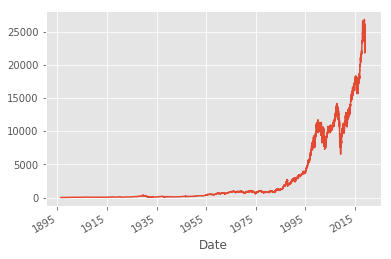

In [4]:
stock_name='^DJI'
df = web.DataReader(stock_name, 'stooq', start, end)
print(df.head())
df['Close'].plot()
plt.show()

                Open      High       Low     Close       Volume
Date                                                           
2019-02-13  21029.93  21213.74  20994.63  21144.48          NaN
2019-02-12  20442.55  20885.88  20432.80  20864.21  866908900.0
2019-02-08  20510.50  20562.39  20315.46  20333.17  888594200.0
2019-02-07  20812.22  20844.77  20665.51  20751.28  727743200.0
2019-02-06  20928.87  20968.03  20861.95  20874.06  710047600.0


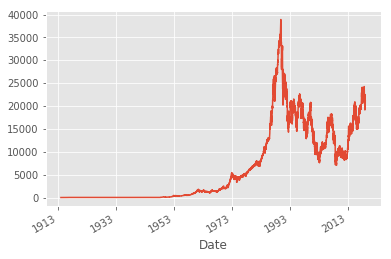

In [5]:
stock_name='^NKX'
df = web.DataReader(stock_name, 'stooq', start, end)
print(df.head())
df['Close'].plot()
plt.show()

In [20]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [11]:
def buildManyToManyModel1(shape):
    model = Sequential()
    model.add(LSTM(10, input_length=shape[1], input_dim=shape[2], return_sequences=True))
    # output shape: (5, 1)
    model.add(TimeDistributed(Dense(1)))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

In [22]:
def buildTrain(train, pastDay=30, futureDay=5):
    X_train, Y_train = [], []
    for i in range(train.shape[0]-futureDay-pastDay):
        X_train.append(np.array(train.iloc[i:i+pastDay]))
        Y_train.append(np.array(train.iloc[i+pastDay:i+pastDay+futureDay]["Close"]))
    return np.array(X_train), np.array(Y_train)

In [23]:
def splitData(X,Y,v_length=90):
    X_train = X[X.shape[0] - v_length:]
    Y_train = Y[Y.shape[0] - v_length:]
    X_val = X[:X.shape[0] - v_length]
    Y_val = Y[:Y.shape[0] - v_length]
    return X_train, Y_train, X_val, Y_val

In [24]:
def readTrain():
    stock_name='^TWSE'
    df = web.DataReader(stock_name, 'stooq')
    train = df
    return train

In [25]:
def normalize(train):
    #train = train.drop(["Date"], axis=1)
    train = train.drop(["Volume"], axis=1)
    train_norm = train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    return train_norm

In [27]:
train = readTrain()
print(train.head())
train_norm = normalize(train)
print(train_norm.head())
# change the last day and next day 
X_train, Y_train = buildTrain(train_norm, 5, 5)
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train)

# from 2 dimmension to 3 dimension
Y_train = Y_train[:,:,np.newaxis]
Y_val = Y_val[:,:,np.newaxis]

model = buildManyToManyModel(X_train.shape)
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
model.fit(X_train, Y_train, epochs=1000, batch_size=128, validation_data=(X_val, Y_val), callbacks=[callback])

                Open      High       Low     Close        Volume
Date                                                            
2019-02-13  10123.61  10140.98  10074.34  10090.58           NaN
2019-02-12  10032.08  10100.23  10032.08  10097.74  2.319601e+09
2019-02-11  10029.84  10065.52   9988.83  10004.25  2.374102e+09
2019-01-30   9915.97   9959.03   9909.81   9932.26  2.028959e+09
2019-01-29   9944.71   9952.34   9893.96   9931.59  1.678626e+09
                Open      High       Low     Close
Date                                              
2019-02-13  0.346534  0.343960  0.346246  0.341956
2019-02-12  0.334751  0.338708  0.340821  0.342874
2019-02-11  0.334463  0.334234  0.335268  0.330898
2019-01-30  0.319803  0.320509  0.325124  0.321677
2019-01-29  0.323503  0.319647  0.323090  0.321591


NameError: name 'buildManyToManyModel' is not defined